In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("D:\\GaTech\\Fall Sem\\BIOL 8901\\Metabolomic Project\\metabolomic_data.xlsx", sheet_name="1-clean data")
data.rename(columns = {'Unnamed: 0': 'ID'}, inplace = True)

C:\Users\nilav\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
ids = data["ID"].tolist()
d = []
for x in ids:
    elements = x.split("_")
    d.extend([[elements[0], "_".join(elements[1:])]])
lineage_data = pd.DataFrame(d, columns = ['ID', 'Lineage'])

In [4]:
sample = pd.read_csv("D:\\GaTech\\Fall Sem\\BIOL 8901\\sample_info.csv")
sample.rename(columns = {'CCLE_Name':'ID'}, inplace=True)

In [5]:
merged_data = data.merge(sample, on='ID')

In [6]:
ids = merged_data["ID"].tolist()
d = []
for x in ids:
    elements = x.split("_")
    d.extend([[elements[0], "_".join(elements[1:])]])
lineage_data = pd.DataFrame(d, columns = ['ID', 'Lineage'])

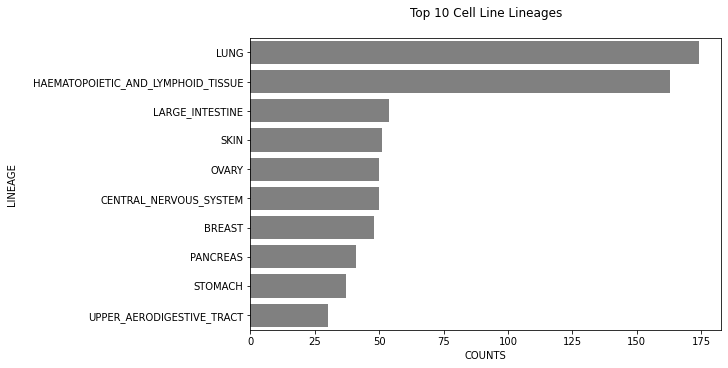

In [7]:
fig, axs = plt.subplots(figsize=(10, 5), ncols=1, constrained_layout=True)

lineage_df = lineage_data.loc[:, ['ID','Lineage']].drop_duplicates().Lineage.value_counts()\
        .to_frame().reset_index().rename(columns = {'index': 'Lineage', 'Lineage': 'Counts'})

l_bp = sns.barplot(data=lineage_df.nlargest(10, 'Counts'), x='Counts', y='Lineage', color='grey', ax=axs)

t = axs.set(xlabel='COUNTS', ylabel='LINEAGE\n', title='Top 10 Cell Line Lineages\n')

In [8]:
drug = pd.read_csv('D:\\GaTech\\Fall Sem\\BIOL 8901\\sanger-dose-response.csv')

In [9]:
drug.rename(columns={'ARXSPAN_ID':'DepMap_ID'}, inplace = True)

In [10]:
working_data = merged_data.merge(drug, on='DepMap_ID')

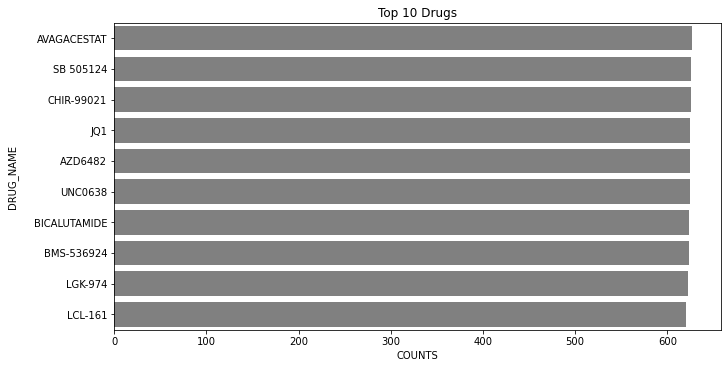

In [11]:
fig, axs = plt.subplots(figsize=(10,5), ncols = 1, constrained_layout=True)

drug_df = working_data.loc[:,['DepMap_ID', 'DRUG_NAME']].drop_duplicates().DRUG_NAME.value_counts()\
        .to_frame().reset_index().rename(columns={'index':'Drug_Name','DRUG_NAME':'Counts'})

l_bp = sns.barplot(data=drug_df.nlargest(10, 'Counts'), x='Counts', y='Drug_Name', color='grey', ax=axs)

t = axs.set(xlabel='COUNTS', ylabel='DRUG_NAME\n', title='Top 10 Drugs')

In [81]:
#select lineage, cell_line_name, count(DRUG_NAME) from working_data groupby (lineage, cell_line_name);

In [87]:
w = working_data.loc[:, ['lineage', 'cell_line_name', 'DRUG_NAME']].value_counts().to_frame().reset_index().rename(columns={0:'# of Drugs'})

In [90]:
x = w.groupby(['lineage', 'cell_line_name']).sum('# of Drugs').reset_index()

In [129]:
x[x['lineage'] == 'ovary'].head().reset_index().drop(columns = 'index')

,lineage,cell_line_name,# of Drugs
0,ovary,A2780,435
1,ovary,Caov-3,178
2,ovary,DOV13,386
3,ovary,EFO-21,429
4,ovary,EFO-27,346


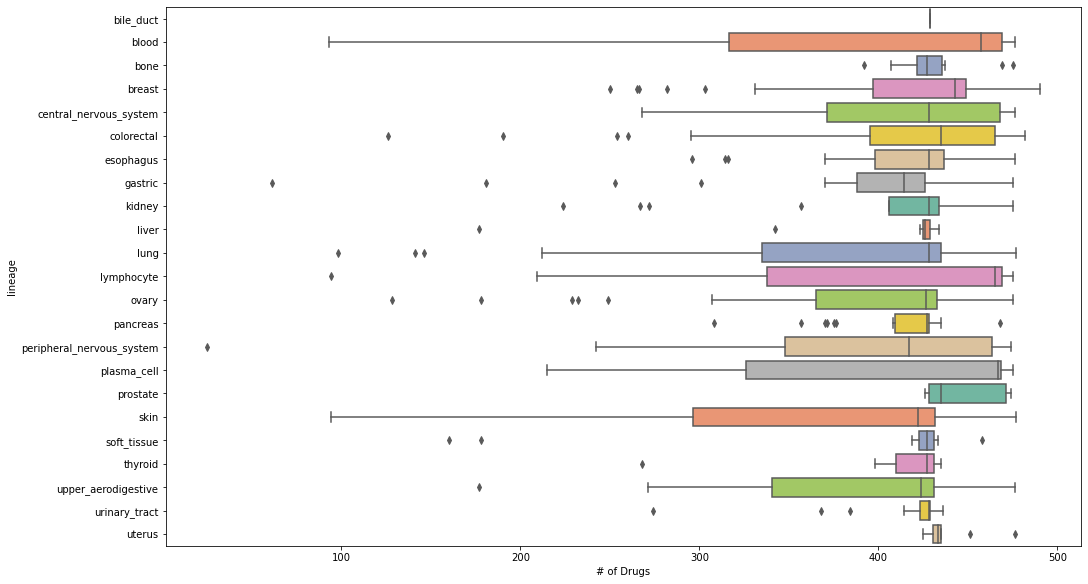

In [125]:
fig, axs = plt.subplots(figsize=(15,8), ncols = 1, constrained_layout=True)

ax = sns.boxplot(data=x, x='# of Drugs', y='lineage', orient='h', palette='Set2')